# TP2 : Simulation de variables aléatoires.

In [1]:
import numpy as np  # Vectors and matrices
from scipy import stats  # Probability distributions
import matplotlib.pyplot as plt  # Plots
from matplotlib import style
# Enable nice plots
try:
    style.use('seaborn-v0_8')
except:
    style.use('seaborn')

## Table des matières : 
1. [Exercice 1 : Modèle fondamental en statistique bayésienne](#part1)
1. [Exercice 2 : Bayes, Cauchy et Gauss](#part2)
1. [Exercice 3 : Monte-Carlo standard versus échantillonnage préférentiel](#part3)
1. [Exercice 4 : Here comes trouble](#part4)
1. [Exercice 5 : Lien géométrique/exponentielle](#part5)
1. [Exercice 6 : Nul n'est censé ignorer la loi normale ](#part6)

## Exercice 1 : Modèle fondamental en statistique bayésienne<a id="part1"></a>
Dans un cadre bayésien, on considère que la loi à priori sur $\boldsymbol  \theta$ est gaussienne standard et que, sachant $\boldsymbol  \theta$, les observations $(X_i)_{1 \leq i \leq n}$ sont i.i.d selon une loi normale de moyenne $\theta$ et de variance $1$, autrement dit : 

\begin{cases}
    \boldsymbol \theta \sim \mathcal N(0, 1) \\
    (X_1, \dots, X_n) | \boldsymbol \theta \sim \mathcal N(\boldsymbol \theta, 1)^{\otimes n}.
    %\mathbf X | \boldsymbol \theta \sim \mathcal N(\boldsymbol \theta, 1)^{\otimes n}.
\end{cases}

> **Question 1.** Rappeler la loi a posteriori de $\boldsymbol  \theta$ sachant $\mathbf{X}=(X_1,\dots,X_n)$. 

$\pi(\boldsymbol \theta | \mathbf{X}) \propto\pi(\boldsymbol \theta) p_{\boldsymbol \theta}(\mathbf{X}) $ 

$ \Leftrightarrow \pi(\boldsymbol \theta | \mathbf{X}) \propto \exp\left(-\dfrac{1}{2}\boldsymbol\theta^2 \right)\exp\left(-\dfrac{1}{2}\displaystyle\sum_{i=1}^{n} (X_i-\boldsymbol \theta)^2 \right)$

$ \Leftrightarrow \pi(\boldsymbol \theta | \mathbf{X}) \propto \exp\left(-\dfrac{1}{2}\left((1+n)\boldsymbol \theta^2-2\boldsymbol\theta n\bar{X_n})\right)\right)$

$ \Leftrightarrow \pi(\boldsymbol \theta | \mathbf{X}) \propto \exp \left( -\dfrac{1+n}{2}\left(\boldsymbol \theta-\dfrac{n\bar{X_n}}{n+1}\right)^2\right)$

Ainsi $\Pi[ \cdot | \mathbf{X}] = \mathcal{N}\left(\dfrac{n\bar{X_n}}{n+1}, \dfrac{1}{n+1}\right).$

> **Question 2.** Effectuer un tirage $\boldsymbol \theta$ suivant la loi gausienne standard : on note $\theta_0$ cette réalisation. Pour $ n=10$, générer des réalisations des varaibles $X_1, ..., X_n$ i.i.d selon une gausienne $\mathcal{N}(\theta_0, 1)$. Représenter sur un même graphique la densité a priori de $\boldsymbol \theta$ et les densités a posteriori des lois de $\boldsymbol \theta$ sachant $(X_1, X_2, X_3)$, sachant $(X_1, ..., X_5)$ et sachant $(X_1,...X_{10})$. Ajouter sur l'axe des abscisses les points de l'échantillon et leur moyenne empirique. 

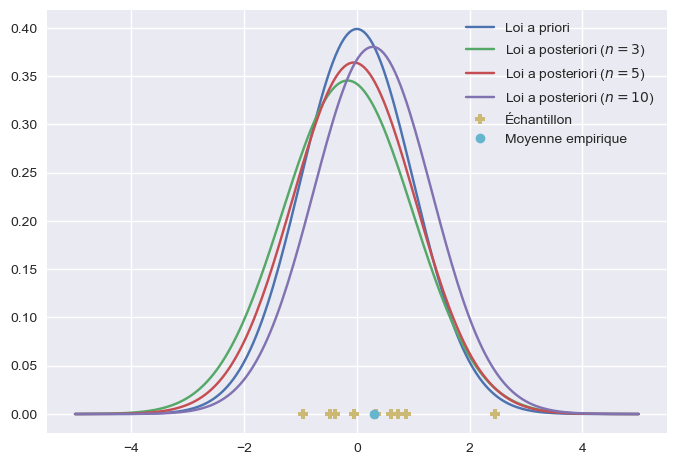

In [37]:
prior = stats.norm(loc = 0, scale = 1)
theta0 = prior.rvs()
ptheta = stats.norm(loc = theta0, scale = 1)

n = 10 
X = ptheta.rvs(size = n)

x = np.linspace(-5,5,200)

plt.plot(x,prior.pdf(x), label="Loi a priori")

for m in [3,5,10] : 
    posterior = stats.norm(loc = X[:m].mean() * m/(m+1), scale = np.sqrt(1/m+1)) #[:m] sélectionne les m premiers éléments.
    plt.plot(x, posterior.pdf(x), label = fr"Loi a posteriori ($n = {m}$)")

plt.plot(X,[0]*X.size, "P", label = "Échantillon")
plt.plot(X.mean(), 0, "o", label = "Moyenne empirique")
plt.legend();

> **Question 3.** Rappeler l'expression de l'estimateur de Bayes pour la perte quadratique, noté $\hat{\theta_n}$, et afficher la valeur de sa réalisation pour les observations $X_1, ..., X_n$ simulées précédemment. 

On sait que pour la perte quadratique, l'estimateur de Bayes est la moyenne a posteriori. Autrement dit : 

$$ \hat{\theta_n}  = \mathbb{E}[\boldsymbol \theta | \mathbf{X}] = \dfrac{n\bar{X_n}}{n+1}$$

In [27]:
print("Estimateur de Bayes = ", X.mean()*(n/(n+1)))

Estimateur de Bayes =  1.002180498708544


> **Question 4.** Retrouver cette valeur par une méthode d'approximation Monte-Carlo basée sur la simulation de $N$ variables $(\boldsymbol \theta)_{1 \leq j \leq N}$ i.i.d selon la loi a priori. Pour $N$ allant de $1$ à $1000$, on tracera sur in même graphique la droite $y = \hat{\theta_n}$ et l'évolution de l'estimateur Monte-Carlo $\hat{\theta_n^N}$. 

La moyenne a posteriori s'écrit de façon générale
$$\hat\theta_n=\mathbb{E}[{\boldsymbol \theta}|\mathbf{X}]=\int_\mathbb{R}\theta\pi(\theta|\mathbf{X})d\theta=\int_\mathbb{R}\theta\left\{\frac{p_\theta(\mathbf{X})\pi(\theta)}{\int_\mathbb{R}p_t(\mathbf{X})\pi(t)dt}\right\}d\theta=\frac{\int_\mathbb{R}\theta p_\theta(\mathbf{X})\pi(\theta)d\theta}{\int_\mathbb{R}p_t(\mathbf{X})\pi(t)dt},$$
où $p_\theta(\mathbf{X}) = \prod_{i=1}^n \left( \frac{1}{\sqrt{2 \pi}} \operatorname{e}^{-\frac{(X_i - \theta)^2}{2}} \right)$ est la vraisemblance de $\theta$.

Numérateur et dénominateur peuvent être vus comme des espérances par rapport à la loi a priori sur ${\boldsymbol \theta}$, à savoir
$$\hat\theta_n=\varphi(\mathbf{X}),\qquad\text{où}\qquad\varphi(x)=\frac{\mathbb{E}\left[{\boldsymbol \theta} p_{\boldsymbol \theta}(x)\right]}{\mathbb{E}\left[p_{\boldsymbol \theta}(x)\right]}.$$

Dès lors, ces deux quantités peuvent être estimées par une méthode Monte-Carlo basée sur la simulation de $N$ variables $({\boldsymbol \theta}_i)_{1\leq i\leq N}$ i.i.d. selon la loi a priori (et indépendamment de $X_1, \dots, X_n$), ce qui conduit à l'estimateur 
$$\hat\theta_n^N=\frac{\frac{1}{N}\sum_{j=1}^N{\boldsymbol \theta}_jp_{\boldsymbol \theta_j}(\mathbf{X})}{\frac{1}{N}\sum_{j=1}^Np_{\boldsymbol \theta_j}(\mathbf{X})}=\frac{\sum_{j=1}^N{\boldsymbol \theta}_jp_{\boldsymbol \theta_j}(\mathbf{X})}{\sum_{j=1}^Np_{\boldsymbol \theta_j}(\mathbf{X})}.$$
Sachant $\mathbf{X}$, la loi forte des grands nombres assure la convergence p.s. de $\hat\theta_n^N$ vers $\hat\theta_n$ lorsque $N$ tend vers l'infini. 

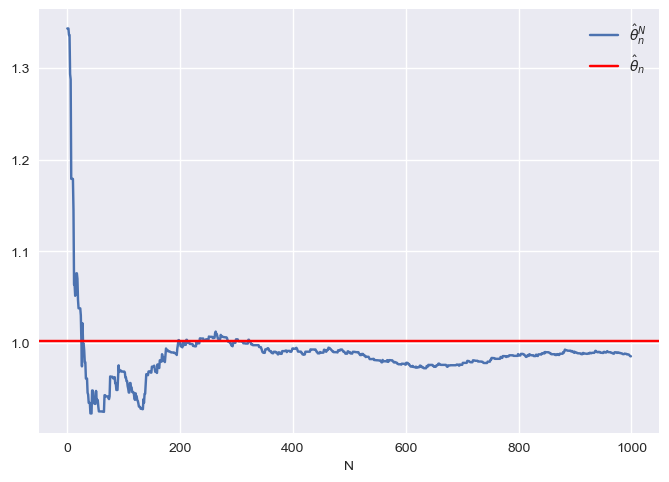

In [36]:
N = 1000
thetas = prior.rvs(size = N)
likelihood = np.asarray([stats.norm(loc = theta, scale = 1).pdf(X).prod() for theta in thetas]) # Vraisemblance. 
estMC = (thetas * likelihood).cumsum() / likelihood.cumsum() 


plt.plot(estMC, label = "$\\hat\\theta_n^N$")
plt.axhline(X.mean() * n/(n+1), color = 'red', label = "$\\hat\\theta_n$") # Estimateur de Bayes. 
plt.xlabel("N")
plt.legend();

## Exercice 2 : Bayes, Cauchy et Gauss <a id="part2"></a>

Dans un cadre bayésien, on considère que la loi a priori sur $\boldsymbol \theta$ est une loi de Cauchy et que, sachant $\boldsymbol \theta$, les variables $(X_i)_{1 \leq i \leq n}$ sont i.i.d selon une loi normale de moyenne $\boldsymbol \theta$ et de variance 1. Autrement dit : 

\begin{cases}
    \boldsymbol \theta \sim \mathcal{Cauchy} \\
    (X_1, \dots, X_n) | \boldsymbol \theta \sim \mathcal N(\boldsymbol \theta, 1)^{\otimes n}.
    %\mathbf X | \boldsymbol \theta \sim \mathcal N(\boldsymbol \theta, 1)^{\otimes n}.
\end{cases}

> **Question 1.** Donner la formule de la densité $\pi(
\theta | \mathbf{X})$ de la loi a posteriori et de l'estimateur de Bayes pour la perte quadratique, noté $\hat{\theta_n}$. 

 On sait que $$\pi( \theta | \mathbf{X}) = \dfrac{\pi(\theta)p_{\theta}(\mathbf{X})}{f(\mathbf{X})}, $$ où : 
 
 * La densité de la loi a priori est :  $\pi(\theta) = \dfrac{1}{\pi(1+\theta^2)}$
 * La vraisemblance est : $p_{\theta}(\mathbf{X}) = \displaystyle \prod_{i=1}^n \dfrac{1}{\sqrt{2\pi}}\exp\left(-\dfrac{(X_i-\theta)^2}{2}\right)$ 
 * La loi marginale des observations : $f(\mathbf{X}) = \displaystyle \int_\mathbb{R} \pi(t)p_t(\mathbf{X})\, dt = \int_\mathbb{R}\frac{1}{\pi(1+t^2)}\left(\prod_{i=1}^n\frac{1}{\sqrt{2\pi}}e^{-\frac{(X_i-t)^2}{2}}\right)dt.$
 
On peut noter que la loi a posteriori n'est pas une loi "classique". La moyenne a posteriori $\hat\theta_n({\bf X})$ est par définition la moyenne de ${\boldsymbol \theta}$ pour cette loi a posteriori, c'est-à-dire
$$\hat\theta_n=\hat\theta_n({\bf X})=\mathbb{E}[{\boldsymbol \theta}|{\bf X}]=\displaystyle\int_\mathbb{R}\theta\ \pi(\theta|{\bf X}) d\theta.$$
On ne dispose pas de formule analytique évidente pour calculer cette intégrale, d'où le recours aux méthodes Monte-Carlo dans la suite.

> **Question 2.** En utilisant par exemple la classe `cauchy` de `scipy.stats`, effectuer un tirage suivant la loi de Cacuchy (on note $\theta_0$ cette réalisation), puis pour $n = 10$ génrer des réalisations des varaibles $X_1, ..., X_n$ i.i.d. selon une loi normale de moyenne $\theta_0$ et de variance $1$. 

In [42]:
n = 10 
prior = stats.cauchy() 
theta0 = prior.rvs()
ptheta = stats.norm(loc = theta0, scale = 1)
X = ptheta.rvs(size = n)

> **Question 3.** En déduire un estimateur Monte-Carlo $\hat{\theta_n^N}$ de l'estimateur de Bayes $\hat{\theta_n}$. L'implémenter sur $N$ allant par exemple de $1$ à $500$. 

En notant $(\boldsymbol \theta_j)_{1 \leq j \leq N}$ i.i.d. selon une loi de Cauchy, un estimateur Monte-Carlo est : 

$$\hat\theta_n^N=\hat\theta_n^N({\bf X})=\frac{\frac{1}{N}\sum_{j=1}^N {\boldsymbol \theta}_j\ p_{{\boldsymbol \theta}_j}({\bf X})}{\frac{1}{N}\sum_{j=1}^N p_{{\boldsymbol \theta}_j}({\bf X})}=\frac{\sum_{j=1}^N{\boldsymbol \theta}_j\exp\left\{-\frac{1}{2}\sum_{i=1}^n({\bf X}_i-{\boldsymbol \theta}_j)^2\right\}}{\sum_{j=1}^N\exp\left\{-\frac{1}{2}\sum_{i=1}^n({\bf X}_i-{\boldsymbol \theta}_j)^2\right\}}.$$

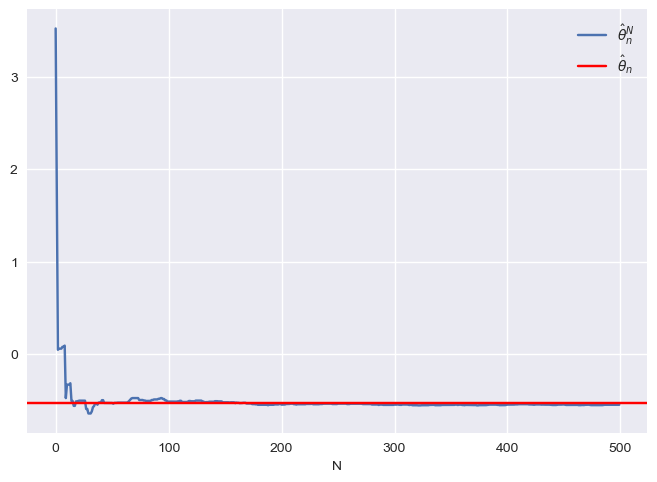

In [44]:
N = 500
thetas = prior.rvs(size = N)
likelihood = np.asarray([stats.norm(loc = theta, scale = 1).pdf(X).prod() for theta in thetas]) # Vraisemblance. 
estMC = (thetas * likelihood).cumsum() / likelihood.cumsum() 

plt.plot(estMC, label = "$\\hat\\theta_n^N$")
plt.axhline(X.mean() * n/(n+1), color = 'red', label = "$\\hat\\theta_n$") # Estimateur de Bayes. 
plt.xlabel("N")
plt.legend();

> **Question 4.** Dans un cadre général, supposons qu'on veuille simuler selon la loi a posteriori $\Pi[\cdot | \mathbf{X}]$. Si on adopte une méthode de rejet avec comme loi instrumentale la loi a priori $\Pi$, montrer que la constante optimale $m$ est liée à l'estimateur du maximum de vraisemblance 
>
>$$ \hat{\theta_n^{\text{MV}}} := \text{argmax}_\theta p_\theta(\mathbf{X})$$ 
>
> La méthode du rejet fait-elle explicitement intervenir la densité marginale de $\mathbf{X}$ ? 

L'intérêt de cette méthode est de ne pas faire appel à la densité marginale $f(\mathbf{X})$, qui est bien souvent hors de portée.

Dans un cadre général, sachant ${\bf X}$, si on adopte une méthode de rejet avec comme loi instrumentale la loi a priori $\Pi$, on cherche donc à majorer le rapport $\dfrac{\pi(\theta|{\bf X})}{\pi(\theta)}$ pour tout $\theta$. Or
$$\frac{\pi(\theta|{\bf X})}{\pi(\theta)}=\frac{p_\theta({\bf X})}{f({\bf X})}\leq m:=\frac{p_{\hat\theta_n^{MV}}({\bf X})}{f({\bf X})}.$$

Pour une méthode de rejet, il suffit donc de simuler selon la loi a priori $\Pi$ et de calculer le rapport d'acceptation

$$\frac{\pi(\theta|{\bf X})}{m\pi(\theta)}=\frac{p_\theta({\bf X})}{p_{\hat\theta_n^{MV}}({\bf X})}.$$

Remarque : ceci implique néanmoins de pouvoir calculer facilement l'estimateur du maximum de vraisemblance $\hat\theta_n^{MV}$ ainsi que la vraisemblance $p_\theta({\bf X})$ en tout point $\theta$. Dans l'exemple considéré dans cet exercice (loi a priori Cauchy et observations i.i.d. gaussiennes), on a tout simplement
$$\hat\theta_n^{MV}=\hat\theta_n^{MV}({\bf X})=\bar X_n$$
et
$$p_\theta({\bf X})=\frac{1}{(2\pi)^{\frac{n}{2}}}\exp\left\{-\frac{1}{2}\sum_{i=1}^n({\bf X}_i-\theta)^2\right\}.$$

> **Question 5.** Si on revient au cas particulier précédent avec les mêmes valeurs de $\mathbf{X} = (X_1, ..., X_n)$, en déduire une méthode rejet pour simuler selon une loi a posteriori. Simuler un échantillon de taille $N = 500$ selon cette loi a posteriori et afficher un histogramme de l'échantillon obtenu. 

Pour tout $\theta$, d'après ce qui précède, le rapport d'acceptation s'écrit
$$\frac{\pi(\theta|{\bf X})}{m\pi(\theta)}=\frac{p_\theta({\bf X})}{p_{\hat\theta_n^{MV}}({\bf X})}=\frac{\exp\left\{-\frac{1}{2}\sum_{i=1}^n({\bf X}_i-\theta)^2\right\}}{\exp\left\{-\frac{1}{2}\sum_{i=1}^n({\bf X}_i-\bar{\bf X}_n)^2\right\}}=\exp\left\{-\frac{n}{2}(\bar{\bf X}_n-\theta)^2\right\}.$$
Pour obtenir une simulation selon la loi a posteriori, il suffit donc de simuler des couples i.i.d. $({\boldsymbol \theta}_k,U_k)_{k\geq 1}$, où ${\boldsymbol \theta}_k$ est simulé selon la loi a priori (Cauchy) indépendamment de $U_k$ (uniforme), jusqu'à ce que 
$$U_k\leq \exp\left\{-\frac{n}{2}(\bar{\bf X}_n-{\boldsymbol \theta}_k)^2\right\}.$$

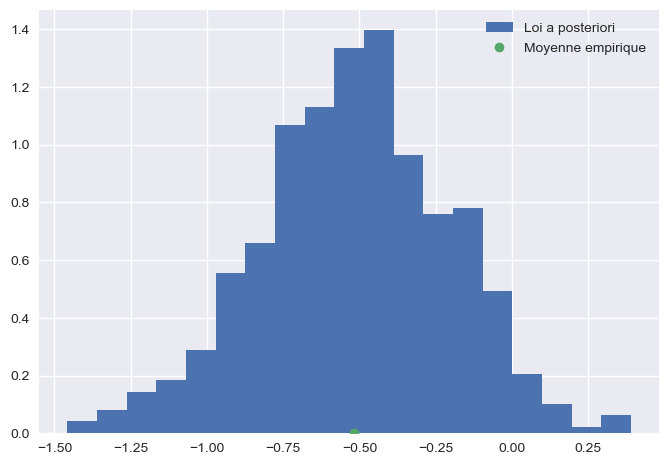

In [54]:
unif = stats.uniform() 
empirical_mean = X.mean()

N = 500

sample = []
while len(sample) < N : 
    theta = prior.rvs()
    threshold = unif.rvs() 
    crit = np.exp(-n/2*(empirical_mean-theta)**2)
    if threshold <= crit  : 
        sample.append(theta)
    
sample = np.asarray(sample)

plt.hist(sample, bins = 'auto', density = True, label = "Loi a posteriori")
plt.plot(sample.mean(), 0, 'o', label = "Moyenne empirique")
plt.legend(); 

> **Question 6.** En déduire un nouvel estimateur $\tilde\theta_n^N$ de $\hat\theta_n$. Sur un même graphique, représenter pour $N$ allant par exemple de 1 à 500 l'évolution des deux estimateurs $\tilde\theta_n^N$ et $\hat\theta_n^N$.

Soit $\tilde\theta_n^N$ la moyenne empirique de l'échantillon obtenu par la méthode de la question précédente. Alors, sachant $\mathbf{X}$, par la loi forte des grands nombres, $\tilde\theta_n^N$ tend p.s. vers $\hat\theta_n$.

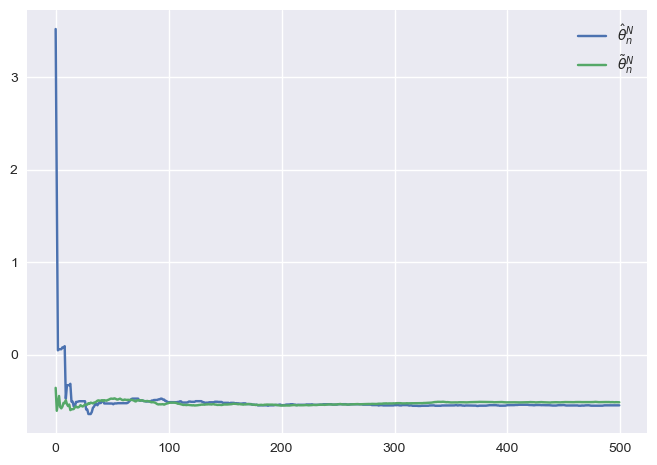

In [55]:
estR = sample.cumsum() / np.arange(1,sample.size+1)

plt.plot(estMC, label="$\\hat\\theta_n^N$")
plt.plot(estR, label="$\\tilde\\theta_n^N$")
plt.legend();

## Exercice 3 : Monte-Carlo standard versus échantillonnage préférentiel <a id="part3"></a>

On veut retrouver par simulation la valeur de $ p = \mathbb{P}(X \geq 6)$ avec $X \sim \mathcal{N}(0,1)$.

> **Question 1.** Déterminer $p$ via la classe `norm` de `scipy.stats`. 

In [65]:
norm = stats.norm()
p = 1-norm.cdf(6)
print("p = ", p)

p =  9.865877004244794e-10


> **Question 2.** Estimer $p$ via l'estimateur Monte-Carlo standard basé sur la simulation de $n$ variables aléatoires gaussiennes avec $n$ le plus grand possible. 

In [66]:
n = int(1e8)
X = norm.rvs(size = n)
threshold = 6
estMC = (X >= threshold).mean() 
print("Estimateur de Monte-Carlo standard : ", estMC)

Estimateur de Monte-Carlo standard :  0.0


> **Question 3.** Si $T$ suit une loi exponentielle de paramètre $1$, donner la densité de l'exponentielle translatée $Y = 6 +T$. En déduire un estimateur d'échantillonnage préférentiel pour $p$, ainsi que les intervalles de confiance asymptotiques à $ 95 \%$. On tracera l'évolution de l'estimateur et des intervalles de confiance pour $n$ allant par exemple de $1$ à $500$. 

La variable $Y$ a pour densité 
$$g(y)=e^{-(y-6)}\mathbf{1}_{y>6}.$$
En notant $f$ la densité d'une gaussienne standard, on a bien
$$g(y)=0\ \Longrightarrow\ f(y)\mathbf{1}_{y>6}=0.$$
En notant $(Y_i)_{1\leq i\leq n}$ un échantillon i.i.d. selon la loi exponentielle translatée, un estimateur par échantillonnage préférentiel s'écrit donc
$$\hat p_n=\frac{1}{n}\sum_{i=1}^n\frac{f(Y_i)}{g(Y_i)}\mathbf{1}_{Y_i>6}=\frac{1}{n}\sum_{i=1}^n\frac{f(Y_i)}{g(Y_i)},$$
la dernière égalité venant du fait que les $Y_i$ simulés sont tous supérieurs à 6.

Par la loi des grands nombres, $\hat p_n$ tend presque sûrement vers $p$. De plus, le Théorème Central Limite donne
$$\sqrt{n}\left(\hat p_n-p\right)\xrightarrow[n\to\infty]{\mathcal{L}}\mathcal{N}(0,\sigma^2),$$
avec
$$\sigma^2=\mathbb{V}\left(\frac{f(Y)}{g(Y)}\mathbf{1}_{Y>6}\right).$$
Cette variance asymptotique peut s'estimer à partir du même échantillon $(Y_i)_{1\leq i\leq n}$ grâce à la variance empirique 
$$\hat\sigma_n^2=\frac{1}{n}\sum_{i=1}^n\left(\frac{f(Y_i)}{g(Y_i)}\right)^2-\hat p_n^2$$
et le Lemme de Slutsky permet d'affirmer que
$$\sqrt{n}\frac{\hat p_n-p}{\hat\sigma_n}\xrightarrow[n\to\infty]{\mathcal{L}}\mathcal{N}(0,1),$$
d'où des intervalles de confiance de niveau asymptotique $(1-\alpha)$ pour $p$ :
$$\left[\hat p_n-\frac{\Phi^{-1}(1-\alpha/2)\hat\sigma_n}{\sqrt{n}}\ ;\ \hat p_n+\frac{\Phi^{-1}(1-\alpha/2)\hat\sigma_n}{\sqrt{n}}\right].$$

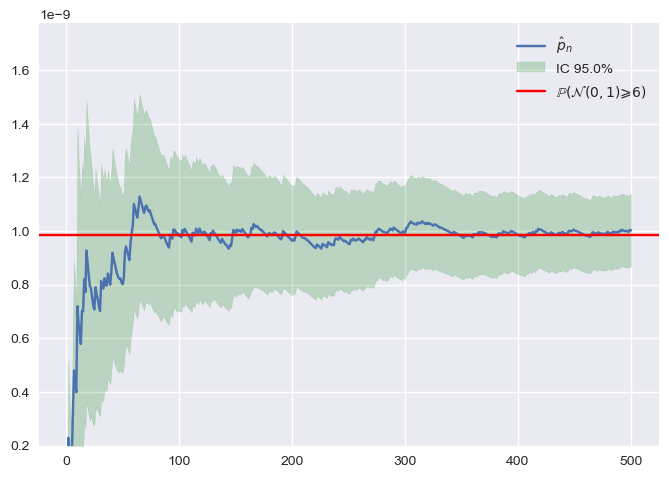

In [67]:
exp = stats.expon(loc = threshold) # Y = 6 + T
level = 0.05 # Niveau de confiance 
n = 500

x = exp.rvs(size = n)
ratio = norm.pdf(x) / exp.pdf(x)

n_range = np.arange(1, n+1)
est = ratio.cumsum() / n_range
ic_bound = np.sqrt(((ratio**2).cumsum() / n_range - est**2) / n_range) * norm.ppf(1-level/2)
std_exp = ic_bound[-1] * np.sqrt(n) / norm.ppf(1-level/2)

plt.plot(n_range, est, label="$\\hat p_n$")
plt.fill_between(n_range, est+ic_bound, est-ic_bound, color='green', alpha=0.2, label=f"IC {100*(1-level)}%")
plt.axhline(1 - norm.cdf(threshold), color='red', label=f"$\\mathbb{{P}}(\\mathcal{{N}}(0, 1) \\geqslant {threshold})$")
plt.ylim(.2*p, 1.8*p)
plt.legend();

> **Question 4.** Faire de même en considérant pour loi d'échantillonnage une loi gaussienne $Y \sim \mathcal{N}(6,1)$. 

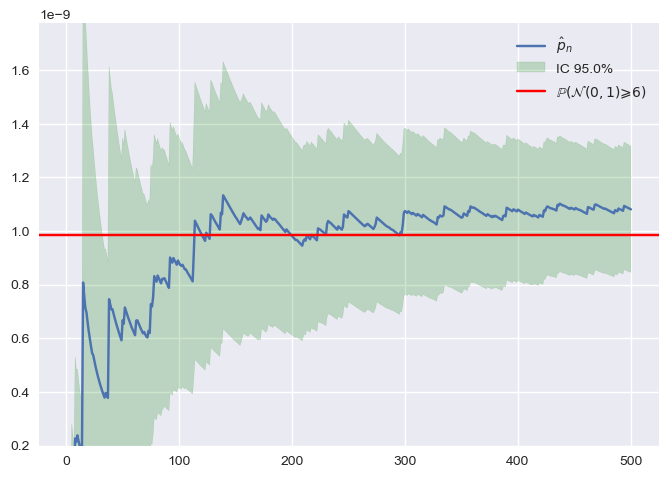

In [71]:
aux = stats.norm(loc=threshold)

x = aux.rvs(size=n)
ratio = norm.pdf(x) * (x>=6) / aux.pdf(x)

est2 = ratio.cumsum() / n_range
ic_bound = np.sqrt(((ratio**2).cumsum() / n_range - est2**2) / n_range) * norm.ppf(1-level/2)
std_gauss = ic_bound[-1] * np.sqrt(n) / norm.ppf(1-level/2)

plt.plot(n_range, est2, label="$\\hat p_n$")
plt.fill_between(n_range, est2+ic_bound, est2-ic_bound, color='green', alpha=0.2, label=f"IC {100*(1-level)}%")
plt.axhline(1 - norm.cdf(threshold), color='red', label=f"$\\mathbb{{P}}(\\mathcal{{N}}(0, 1) \\geqslant {threshold})$")
plt.ylim(.2*p, 1.8*p)
plt.legend();

> **Question 5.** Lequel est-il préférable ? 

Les deux estimateurs étant asymptotiquement normaux, on choisit celui qui a le plus petit écart-type asymptotique. Puisqu'on dispose d'estimateurs consistants pour ceux-ci, tout le travail a déjà été fait.

In [72]:
print('Écart type, cas exponentiel :', std_exp)
print('Écart type, cas gaussien    :', std_gauss)

Écart type, cas exponentiel : 1.5318613645369723e-09
Écart type, cas gaussien    : 2.680647121557862e-09


## Exercice 4 : Here comes trouble <a id="part4"></a>

On veut retrouver par simulation la valeur de $ p = \mathbb{P}(X \geq 10)$ avec $X$ qui suit la loi de Pareto de paramètre $(1,3)$, autrement dit $X$ admet comme densité (par rapport à la mesure de Lebesgue) $f(x) = 3x^{-4}\mathbb 1_{x\geq1}$. 

> **Question 1:** Déterminer la valeur de $p$. 

$p = 1 - \mathbb{P}(X \leq 10) = 1 - \displaystyle \int_1^{10} \dfrac{3}{x^4} \,dx = 1 - \left[ -x^{-3}\right]_1^{10} = 10^{-3}$. 

> **Question 2:** Proposer une méthode de simulation par inversion pour simuler suivant la loi de $X$. 

On illustre ici la méthode par inversion de la fonction de répartition. Explicitons cette dernière. 

$$F(x) = \displaystyle \int_{-\infty}^x f(x) \, dx = \displaystyle \int_1^x \dfrac{3}{t^4}\,dt \mathbb{1}_{x \geq 1} = \left[-t^{-3}\right]_1^{x} \mathbb{1}_{x \geq 1} = \left(1-\dfrac{1}{x^3}\right)\mathbb{1}_{x\geq1}.$$ 

Ainsi pour tout $u \,\in \, [0,1[ $ : 

$$F^{-1}(u) = \dfrac{1}{(1-u)^{1/3}}.$$

Pour toute variable $ U \sim \mathcal{U}([0,1])$, $F^{-1}(U)$ suit une loi de Pareto de paramètres $(1,3)$. 

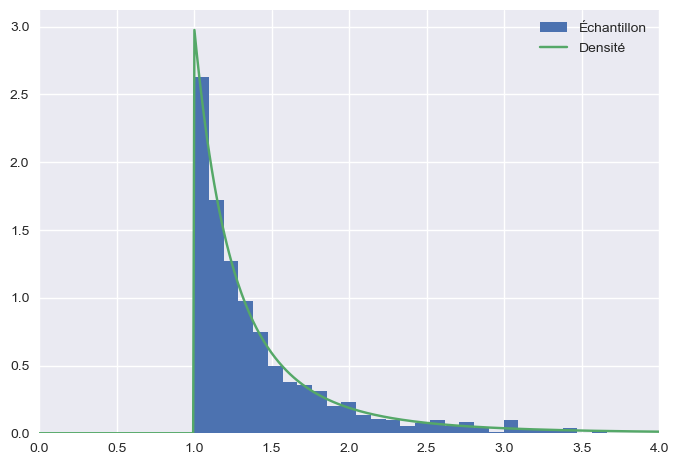

In [6]:
unif = stats.uniform()
pareto = stats.pareto(b = 3)

n = 1000
u = unif.rvs(size = n)
x = 1/(1-u)**(1/3)

t = np.linspace(0, 4, 500)
plt.hist(x, bins = 'auto', density = True, label = "Échantillon")
plt.plot(t, pareto.pdf(t), label = "Densité")
plt.legend()
plt.xlim(0, t.max())
plt.show()

> **Question 3:** Illustrer la convergence de l'estimateur Monte-Carlo standard, ainsi que les intervalles de confiance asymptotiques à $95 \%$ (on pourra utiliser la question précédente, ou bien `stats.pareto`). 

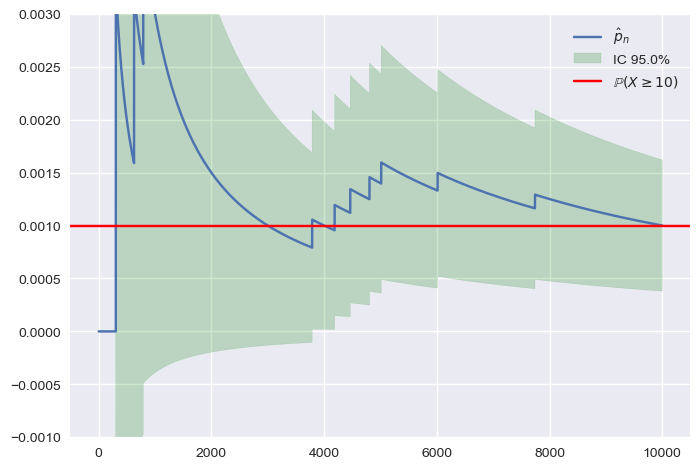

In [11]:
threshold = 10
alpha = 0.05

norm = stats.norm()
pareto = stats.pareto(b = 3)

p = 1 - pareto.cdf(threshold) # = 1e-3 calulé à la question 1 
n = 10000
x = pareto.rvs(size = n)

n_range = np.arange(1, n+1)
est = (x >= threshold).cumsum() / n_range
ic_bound = np.sqrt((est*(1-est)) / n_range) * norm.ppf(1-alpha/2)

plt.plot(n_range, est, label = "$\\hat p_n$")
plt.fill_between(n_range, est + ic_bound, est - ic_bound, color = "green", alpha = 0.2, label = f"IC {100*(1-alpha)}%")
plt.axhline(p, color = "red", label = f"$\\mathbb{{P}}(X \\geq {threshold})$")
plt.ylim(-p, 3*p)
plt.legend()
plt.show()

> **Question 4:** Utiliser une loi exponentielle translatée pour estimer $p$ par échantillonnage préférentiel, représenter la convergece, les intervalles de confiance, et expliquer ce qui se passe. 

Si on utilise une loi exponentielle translatée pour estimer $p$ par échantillonnage préférentiel, on voit sur la simulation ci-après que les intervalles de confiance sont complètement instables. Ceci est dû au fait que, en notant $f$ la densité de la loi d'origine (Pareto) et $g$ celle de la loi instrumentale (exponentielle), l'hypothèse 
$$\mathbb{V}\left(\frac{f(Y)}{g(Y)}\mathbf{1}_{Y>10}\right)<\infty$$ 
n'est pas vérifiée dans ce contexte :
$$\mathbb{E}\left[\left(\frac{f(Y)}{g(Y)}\mathbf{1}_{Y>10}\right)^2\right]=\int_{10}^\infty\left(\frac{3y^{-4}}{e^{-(y-10)}}\right)^2e^{-(y-10)}dy=\int_{10}^\infty9y^{-8}e^{y-10}dy=+\infty.$$
Dit simplement, la loi exponentielle est à queue de distribution plus légère que la loi de Pareto, ce qui explique les sauts dans l'estimateur par échantillonnage préférentiel : dès que $Y_i$ prend une "grande valeur", le rapport $f(Y_i)/g(Y_i)=3Y_i^{-4}\exp(Y_i-10)$ explose. Morale de l'histoire : pour la méthode d'importance sampling, il ne faut pas prendre comme loi instrumentale (i.e. celle de $Y$) une loi à queue plus légère que la loi d'origine (i.e. celle de $X$) si l'on veut une précision (i.e. des intervalles de confiance) sur le résultat !

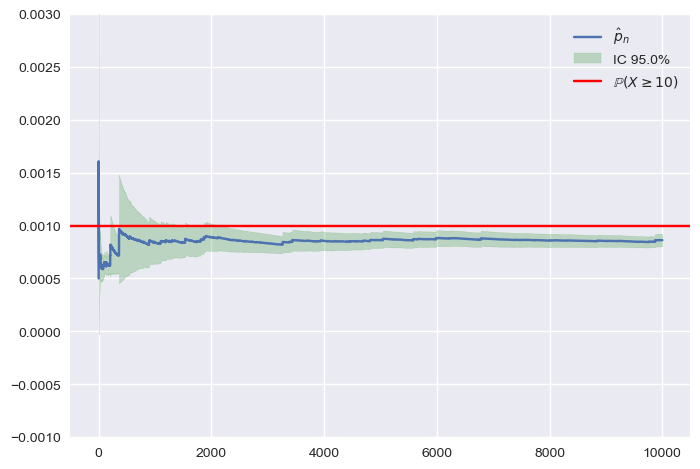

In [13]:
aux = stats.expon(loc = threshold)
level = 0.05

x = aux.rvs(size=n)
ratio = pareto.pdf(x) / aux.pdf(x)

est = ratio.cumsum() / n_range
ic_bound = np.sqrt(((ratio**2).cumsum() / n_range - est**2) / n_range) * norm.ppf(1-level/2)

plt.plot(n_range, est, label="$\\hat p_n$")
plt.fill_between(n_range, est+ic_bound, est-ic_bound, color='green', alpha=0.2, label=f"IC {100*(1-level)}%")
plt.axhline(p, color='red', label = f"$\\mathbb{{P}}(X \\geq {threshold})$")
plt.ylim(-p, 3*p)
plt.legend();

## Exercice 5 : Lien géométrique / exponentielle <a id="part5"></a>

Soient $0 < p < 1$ et $X$ une variable aléatoire suivant une loi géométrique $\mathcal{G}(p)$ à valeurs dans $\mathbb{N}^{*}$; autrement dit : 

$$ \forall k \in \mathbb{N}^{*}, \hspace{1cm} \mathbb{P}(X = k) = p(1-p)^{k-1}.$$ 

> **Question 1:** Prenons $p = \dfrac{1}{3}$. Grâce à `stats.geom`, générer un échantillon de grande taille $n$ et chronométrer la durée d'exécurtion (on pourra utiliser la fonction `perf_counter` du module `time`). 

In [24]:
from time import perf_counter 

p = 1/3 
n = 10**8 
t0 = perf_counter()
X = stats.geom.rvs(size = n, p = p)
print("Durée (s) : ", perf_counter() - t0)

Durée (s) :  4.169019086000844


> **Question 2:** Soit $(B_k)_{k\geq 1}$ une suite de variables i.i.d. selon une loi de Bernoulli ${\cal B}(p)$. Comment obtenir une variable $X$ de loi géométrique ${\cal G}(p)$ à partir de celles-ci ? Implémenter cette méthode. Que se passe-t-il lorsque $p$ est proche de 0 ?

Par le hypothèses réalisées sur la suite $(B_k)_{k \geq 1}$, la variable aléatoire 

$$ X = \min\{k \geq 1, B_k = 1\}  \sim \mathcal{G}(p).$$ 

Il est clair que si $p$ est proche de $0$, cette méthode est très lente car il faudra (en moyenne) simuler $\dfrac{1}{p}$ variables de Bernouilli pour avoir une réalisation de $X$. 

In [22]:
X = 0
k = 1

while X == 0 : 
    if stats.bernoulli.rvs(size = 1, p = p) == 1 : 
        X = k 
    else : 
        k += 1 
print(X)

4


>**Question 3:** En prenant toujours $ p =\dfrac{1}{3}$, implémenter la méthode précédente pour une grande valeur de $n$ et chronométrer le résultat. 

In [25]:
n = 10**5 
t0 = perf_counter()
X = np.zeros(n)

for i in range(n) : 
    k = 1 
    while X[i] == 0 : 
        if stats.bernoulli.rvs(size = 1, p = p) == 1 : 
            X[i] = k
        else : 
            k += 1 

print("Durée (s) : ", perf_counter() - t0)

Durée (s) :  13.18580749800094


> **Question 4:** Soit $\lambda>0$ et $T$ une variable aléatoire suivant une loi exponentielle ${\cal E}(\lambda)$. Soit $X=\lceil T\rceil$ la partie entière par excès de $T$ (i.e. $\lceil 0.4\rceil =1$ et $\lceil 2\rceil =2$). Quelles valeurs peut prendre $X$ ? Avec quelles probabilités ? En déduire un moyen de générer une loi géométrique ${\cal G}(p)$. 

Il est clair que si $T \sim \mathcal{E}(\lambda)$, alors $X=\lceil T\rceil$ est à valeurs dans $\mathbb{N}^{\star}$. Soit $k \geq 1$. Alors : 

$$ \mathbb{P}(X = k) = \mathbb{P}(k-1 < T \leq k) = 1 - e^{-\lambda k} - \left(1 - e^{-\lambda (k-1)}\right) = e^{-\lambda (k-1)} - e^{-\lambda k} = e^{-\lambda (k-1)}\left(1-e^{-\lambda}\right)$$

Ainsi $X \sim \mathcal{G}\left(1-e^{-\lambda}\right)$. Finalement, pour simuler une loi géométrique de paramètre $p$, il faut $\lambda > 0$ t.q. 

$$1-e^{-\lambda} = p$$

$$ \Leftrightarrow \lambda = -\ln(1-p)$$

> **Question 5:** Implémenter la méthode précédente pour générer un échantillon de grande taille $n$. Chronométrer la durée d'éxécution et comparer avec la **Question 1**. 

In [26]:
n = 10**8
theta = -1/np.log(1-p)

t0 = perf_counter()

ech = np.ceil(stats.expon.rvs(size = n, scale = theta))
print("Durée (s) : ", perf_counter() - t0)

Durée (s) :  3.621909906998553


> **Question 6:** Que donne la méthode d'inversion  ? 

Puisque $X$ est à valeurs dans $\mathbb{N}^\star$ avec $\mathbb{P}(X=n)=p_n=p(1-p)^{n-1}$, l'inverse généralisée de sa fonction de répartition s'écrit d'après le cours, pour tout $u\in]0,1]$ :
$$F^{-1}(u)=\sum_{n=1}^\infty n\ \mathbf{1}_{p_1+\dots+p_{n-1}<u\leq p_1+\dots+p_{n}}=\sum_{n=1}^\infty n\ \mathbf{1}_{1-(1-p)^{n-1}<u\leq 1-(1-p)^{n}}.$$
La méthode d'inversion assure que, si $U$ suit une loi uniforme sur $[0,1]$, la variable $X=F^{-1}(U)$ suit une lui géométrique de paramètre $p$. Or, d'après ce qui vient d'être dit, 
$$X=F^{-1}(U)\ \Longleftrightarrow\ 1-(1-p)^{X-1}<U\leq 1-(1-p)^{X}\ \Longleftrightarrow\ X=\left\lceil\frac{\log(1-U)}{\log(1-p)}\right\rceil, $$
et puisque la variable $\lceil(\log(1-U))/(\log(1-p))\rceil$ suit une loi exponentielle de paramètre $-\log(1-p)$, on retrouve exactement la méthode de seuillage d'une loi exponentielle vue précédemment.

## Exercice 6 : Nul n'est censé ignorer la loi normale  <a id="part6"></a>


>**Question 1.**
Soit $(U,V)$ un couple de variables i.i.d. de loi uniforme sur $[0,1]$. Montrer que les variables $X$ et $Y$ définies par
$$\left\{ \begin{array}{l}
           X=\sqrt{-2\log U}\times\cos(2\pi V)\\
           Y=\sqrt{-2\log U}\times\sin(2\pi V)\\
          \end {array}\right .$$
sont i.i.d. gaussiennes centrées réduites.

On applique la méthode de la fonction muette. Soit donc $\varphi:\mathbb{R}^2\to\mathbb{R}$ une fonction test (par exemple continue bornée), alors le Théorème de Transfert implique :
$$\mathbb{E}\left[\varphi(X,Y)\right]=\mathbb{E}\left[\varphi\left(\sqrt{-2\log U}\cos(2\pi V),\sqrt{-2\log U}\sin(2\pi V)\right)\right]=\iint_{]0,1[^2}\varphi\left(\sqrt{-2\log u}\cos(2\pi v),\sqrt{-2\log u}\sin(2\pi v)\right)dudv.$$
L'application $h:(u,v)\mapsto(x,y)$ est clairement un $C^1$-difféomorphisme de $]0,1[^2$ dans $\mathbb{R}^2$ (à des ensembles de mesure nulle près) et on peut donc appliquer la formule de changement de variables :
$$\mathbb{E}\left[\varphi(X,Y)\right]=\iint_{\mathbb{R}^2}\varphi(x,y)\left|J_{h^{-1}}(x,y)\right|dxdy=\iint_{\mathbb{R}^2}\varphi(x,y)\frac{1}{\left|J_{h}(h^{-1}(x,y))\right|}dxdy.$$
Il reste à calculer le jacobien de $h$ :
$$J_{h}(u,v)=\det \left(\left[\begin{array}{l}
\frac{-\cos(2\pi v)}{u\sqrt{-2\log u}}&-2\pi\sqrt{-2\log u}\sin(2\pi v)\\
\frac{-\sin(2\pi v)}{u\sqrt{-2\log u}}&+2\pi\sqrt{-2\log u}\cos(2\pi v)
\end{array}\right] \right)\ \Longrightarrow\ |J_{h}(u,v)|=\frac{2\pi}{u}\ \Longrightarrow\ \frac{1}{|J_{h}(u,v)|}=\frac{u}{2\pi}.$$
Or $u=e^{-\frac{x^2+y^2}{2}}$, donc
$$\frac{1}{\left|J_{h}(h^{-1}(x,y))\right|}=\frac{1}{2\pi}e^{-\frac{x^2+y^2}{2}},$$
ce qui donne au final
$$\mathbb{E}\left[\varphi(X,Y)\right]=\iint_{\mathbb{R}^2}\varphi(x,y)\frac{1}{2\pi}e^{-\frac{x^2+y^2}{2}}dxdy$$
et montre que les variables $X$ et $Y$ sont bien i.i.d. gaussiennes centrées réduites.

 >**Question 2.** Algorithme de Box-Muller : estimer le temps nécessaire pour simuler $n=10^7$  gaussiennes avec la méthode de la question précédente. Le comparer à celui mis par la fonction `norm` du module `stats`.

In [27]:
n = 10**7
t0 = perf_counter()
R = np.sqrt(-2*np.log(stats.uniform.rvs(size=n//2))) 
theta = 2*np.pi*stats.uniform.rvs(size=n//2)
X = np.concatenate((R*np.cos(theta),R*np.sin(theta)))
print('Durée Box-Muller (s) :', perf_counter()-t0)

t0 = perf_counter()
ech = stats.norm.rvs(size=n)
print('Durée stats.norm (s) :', perf_counter()-t0)

Durée Box-Muller (s) : 0.38647272200068983
Durée stats.norm (s) : 0.41302872999949614


Les durées sont comparables. 

>**Question 3.**
Déterminer la loi du couple de variables aléatoires $(W, Z) = \left( \sqrt{U} \cos(2 \pi V), \sqrt{U} \sin(2 \pi V) \right)$.
Comment peut-on simuler cette loi par méthode du rejet ?

L'application $h : (u, v) \in ]0, 1]^2 \mapsto \left( \sqrt{u} \cos(2 \pi v), \sqrt{u} \sin(2 \pi v) \right) \in \mathcal D$, où $\mathcal D$ est le disque unité privé de son centre, est un $C^1$-difféomorphisme, de jacobien $\pi$ (informellement, le changement de variable $(w, z) = h(u, v)$ aboutit donc à $dwdz = \pi dudv$).
Ainsi, pour toute fonction $\varphi : \mathbb R^2 \to \mathbb R$ continue bonée,
$$
    \mathbb{E}\left[\varphi(W, Z)\right]
    = \iint_{]0, 1]^2} \varphi \left( \sqrt{u} \cos(2 \pi v), \sqrt{u} \sin(2 \pi v) \right) \, dudv
    = \iint_{\mathcal D} \varphi(w, z) \frac 1 \pi \, dwdz.
$$
Ceci montre que $(W, Z)$ est uniformément distribué sur $\mathcal D$.

**Remarque :**
Cela revient à déterminer la loi du couple de variables aléatoires $(W, Z) = \left( \frac{X}{\sqrt{X^2+Y^2}} e^{-\frac{X^2+Y^2}{4}}, \frac{Y}{\sqrt{X^2+Y^2}} e^{-\frac{X^2+Y^2}{4}} \right)$.
Alternativement, en prenant $\boldsymbol \theta \sim \mathcal U([0, 2\pi])$ indépendant de $R$ de densité $r \mapsto r e^{- \frac{r^2}{2}} \mathbf 1_{\mathbb R_+}(r)$, on peut aussi considérer le couple $(W, Z) = \left( \cos(\boldsymbol \theta) e^{- \frac{R^2}{4}}, \sin(\boldsymbol \theta) e^{- \frac{R^2}{4}} \right)$.

La densité de la loi que l'on cherche à échantillonner est $f : (w, z) \mapsto \frac{1}{\pi} \mathbb 1_{(w, z) \in \mathcal D}$.
Considérons la loi uniforme sur $[-1, 1]^2$, de densité $g : (w, z) \mapsto \frac{1}{4} \mathbb 1_{(w, z) \in [-1, 1]^2}$.
Nous avons bien $f \le m g$, avec $m = \frac{4}{\pi}$, donc l'algorithme du rejet nous assure que $Z_\tau \sim \mathcal U(\mathcal D)$ lorsque
$(Z_n)_{n \ge 1}$ est i.i.d. selon $\mathcal U([0, 1]^2)$ et
$$
    \tau = \inf \left\{ i \in \mathbb N^\star, r(Z_i) \ge T_i \quad (\star) \right\},
$$
où
1. $(T_n)_{n \ge 1}$ est i.i.d. selon $\mathcal U([0, 1])$ et indépendant de $(Z_n)_{n \ge 1}$ ;
1. $r(z) = \frac{f(z)}{m g(z)} = \frac{\mathbb 1_{z \in \mathcal D}}{\mathbb 1_{z \in [-1, 1]^2}}, \forall z \in \mathbb R^2$ (avec la possibilité de prendre la valeur $\infty$).
Dans notre cas, $r(Z_i) = \mathbb 1_{Z_i \in \mathcal D}$ presque sûrement et le critère $(\star)$ est alors équivalent à $Z_i \in \mathcal D$ presque sûrement.

Autrement dit, l'algorithme du rejet revient à échantillonner sur le carré $[-1, 1]^2$ puis à conserver uniquement les points tombant à l'intérieur du disque unité.

Taille de l'échantillon : 1614


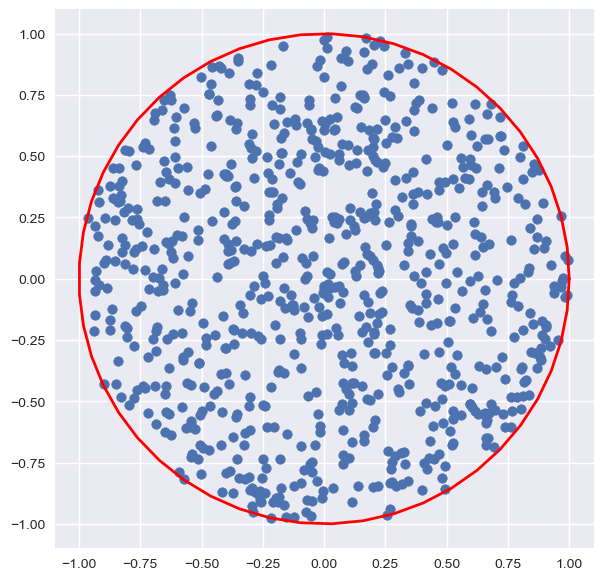

In [28]:
n = 10**3

unif = stats.uniform(loc=-1, scale=2)
z = unif.rvs(size=(2, n))
s = np.sum(z**2, axis=0)
z = z[:, np.logical_and(0 < s, s <= 1)]
print("Taille de l'échantillon :", z.size)

t = np.linspace(0, 2*np.pi, num=50)

plt.figure(figsize=(7, 7))
plt.scatter(z[0], z[1])
plt.plot(np.cos(t), np.sin(t), 'r', lw=2)
plt.axis('image');

>**Question 4.**
Méthode polaire de Marsaglia : déduire de la question précédente une nouvelle méthode de simulation de la loi $\mathcal N(0, 1)$.
Quel est son avantage par rapport à l'algorithme de Box-Muller.
Quel est son défaut ?

Par construction,
\begin{cases}
    X &= \sqrt{-2\log U} \cos(2\pi V) = \sqrt{-2\log U} \frac{W}{\sqrt U} = \sqrt{-2\log(W^2+Z^2)} \frac{W}{\sqrt{W^2+Z^2}}\\
    Y &= \sqrt{-2\log U} \sin(2\pi V) = \sqrt{-2\log U} \frac{Z}{\sqrt U} = \sqrt{-2\log(W^2+Z^2)} \frac{Z}{\sqrt{W^2+Z^2}}.
\end{cases}
Pour échantillonner $(W, Z)$ sur $\mathcal D$, il suffit d'appliquer la méthode du rejet comme vu à la question précédente.
D'où le code de simulation suivant.

L'avantage de la méthode polaire est de s'affranchir des calculs de cosinus et sinus (qui sont relativement coûteux) : en effet, le point $\left(\frac{W}{\sqrt{W^2+Z^2}}, \frac{Z}{\sqrt{W^2+Z^2}} \right)$ est sur le cercle unité, ainsi ses coordonnées peuvent naturellement être interprétées par $(\cos \theta, \sin \theta)$.
Le défaut de cette approche est d'utiliser une méthode de rejet mais en réalité, on rejette relativement peu : en moyenne environ un point sur 5 (précisément une proportion égale à $1-\pi/4\approx 0,21$).

Taille de l'échantillon : 10000000
Durée méthode polaire (s) : 0.7692474909999873


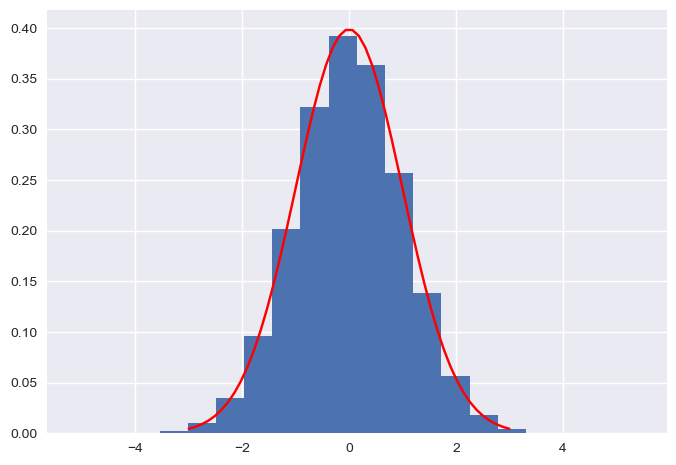

In [29]:
n = 10**7

t0 = perf_counter()
unif = stats.uniform(loc=-1, scale=2)
z = unif.rvs(size=(2, int(n/2*1.5)))
s = np.sum(z**2, axis=0)
z = z[:, np.logical_and(0 < s, s <= 1)][:, :n//2]
print("Taille de l'échantillon :", z.size)

s = np.sum(z**2, axis=0)
X = (np.sqrt(-2*np.log(s)) * z / np.sqrt(s)).ravel()
print('Durée méthode polaire (s) :', perf_counter()-t0)

norm = stats.norm()
x = np.linspace(-3, 3)
plt.hist(X, bins=20, density=True)
plt.plot(x, norm.pdf(x), 'r-');

>**Question 5.** Simuler et représenter $n=1000$ réalisations d'une loi normale multivariée ${\cal N}(m,\Gamma)$ avec
$$m=\left[\begin{array}{l}
2\\
1\end{array}\right]\hspace{1cm}\mbox{et}\hspace{1cm}\Gamma=\left[\begin{array}{ll}
1&1\\
1&4\end{array}\right].$$
Retrouver approximativement $m$ et $\Gamma$ à partir de cet échantillon.

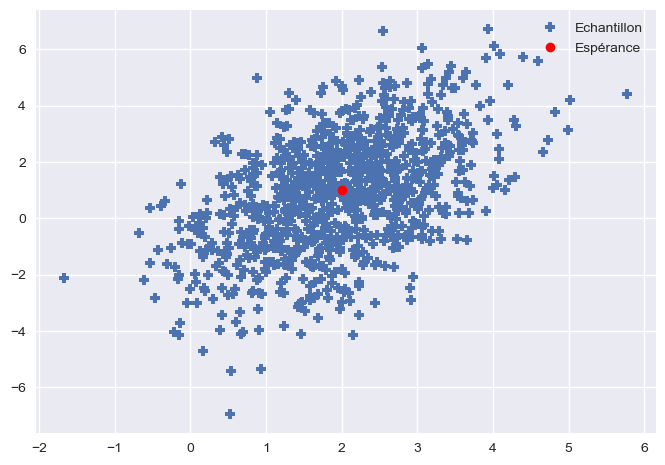

In [30]:
n = 10**3
m = [2,1]
Gamma = [[1,1],[1,4]]

x, y = stats.multivariate_normal.rvs(size=n,mean=m, cov=Gamma).T
plt.plot(x, y, 'P', label="Echantillon")
plt.plot(*m ,'o', color="red", label="Espérance")
plt.legend();

In [31]:
print("Moyenne empirique :", x.mean(),y.mean())
print("Matrice de covariance empirique :", np.cov(x,y))

Moyenne empirique : 1.962775878604401 0.8904667719350527
Matrice de covariance empirique : [[1.00558528 0.99842524]
 [0.99842524 3.98339975]]
